<a href="https://colab.research.google.com/github/kigit2017/Timeseries/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!nvidia -smi -L

/bin/bash: line 1: nvidia: command not found


In [7]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-01-09 18:15:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.01s   

2024-01-09 18:15:08 (11.4 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [8]:
import pandas as pd
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])

In [9]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [10]:
df.describe()

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
count,2787.000000,2787.000000,2787.000000,2787.000000
mean,6529.845141,6513.579485,6710.061683,6302.417386
std,10887.847444,10863.800772,11206.779756,10475.811252
min,108.584830,108.584830,118.675000,83.328330
25%,460.087500,459.400500,469.720995,450.818830
50%,2780.182500,2772.367500,2874.696250,2696.457500
75%,8506.923720,8496.887593,8763.291985,8221.060570
max,63346.789035,63562.673545,64801.787870,62094.632914


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


get closing price for each day

In [12]:
closing_price = pd.DataFrame(df['Closing Price (USD)']).rename(columns={"Closing Price (USD)": "Price"})

In [13]:
closing_price

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


Plot bitcoin price for the timeseries

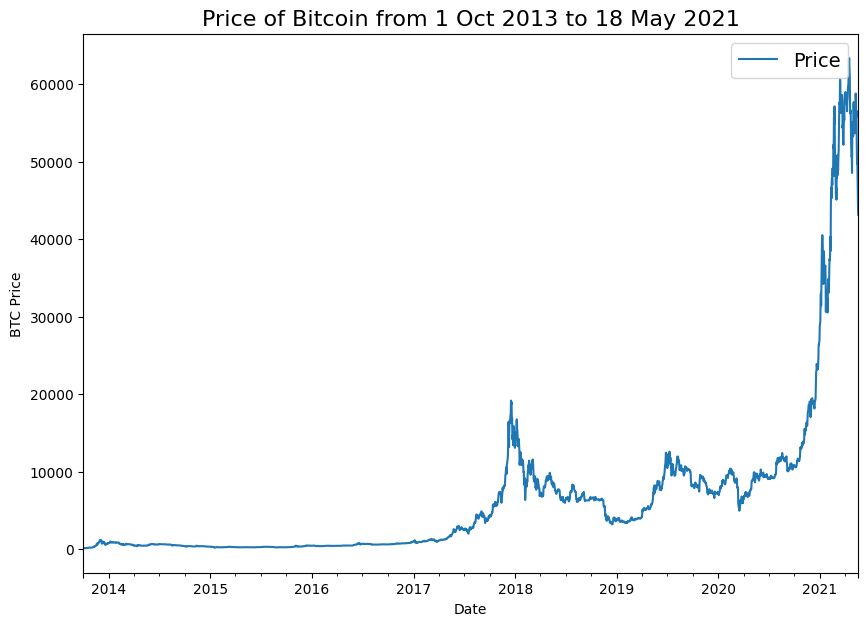

In [14]:
import matplotlib.pyplot as plt
closing_price.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)

Prepare Train test split data for X,y

In [15]:
timesteps =  closing_price.index.to_numpy()
prices= closing_price["Price"].to_numpy()
timesteps[:10]

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
       '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
       '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
       '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [16]:

prices[:10]


array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  , 123.033  , 124.049  , 125.96116])

train test split algorithm for for X,y data sets

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(timesteps,prices,test_size= .2,random_state=41)

training and test counts

In [18]:
X_train.size,X_test.size,y_train.size,y_test.size

(2229, 558, 2229, 558)

plot train and testsets

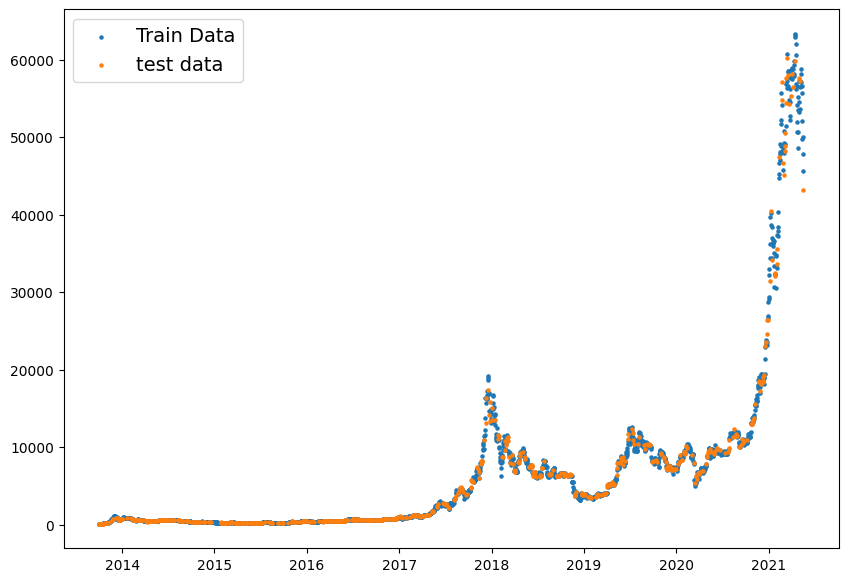

In [19]:
plt.figure(figsize= (10,7))
plt.scatter(X_train,y_train,s=5,label="Train Data")
plt.scatter(X_test,y_test,s=5,label="test data")
plt.legend(fontsize=14)
plt.show()


Previous plot has the traina nd test data spread throughout the scatter plot. To create train and test set for time series data , split data within a time limit. (and not throughout the data set), to disctinguish train and test data for timeseries

In [20]:
split_size = int(0.8 * len(prices))#80 percent
split_size

2229

In [21]:
X_train,y_train = timesteps[:split_size],prices[:split_size]
X_test,y_test = timesteps[split_size:],prices[split_size:]

In [22]:
len(X_train),len(X_test),len(y_train),len(y_test)

(2229, 558, 2229, 558)

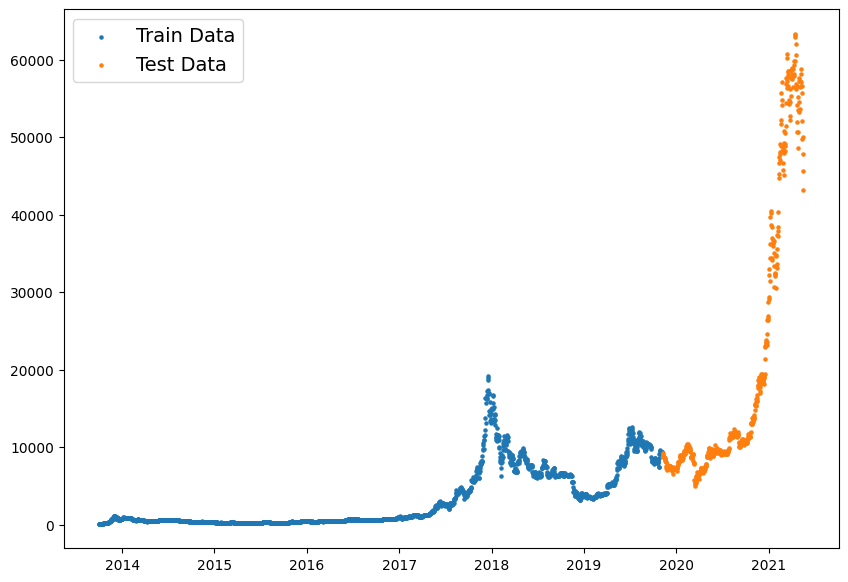

In [23]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train Data")
plt.scatter(X_test,y_test,s=5,label="Test Data")
plt.legend(fontsize=14)
plt.show()

We are using train ing data to traina  model to predict the future test.

Function to plot timeseries batches with start and end time intervals,using the scatterplot above.

In [24]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  plt.plot(timesteps[start:end],values[start:end],format,label=label)
  plt.xlabel="Time"
  plt.ylabel = "BTC price"
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

try the plot function passing X_train and y_train sets

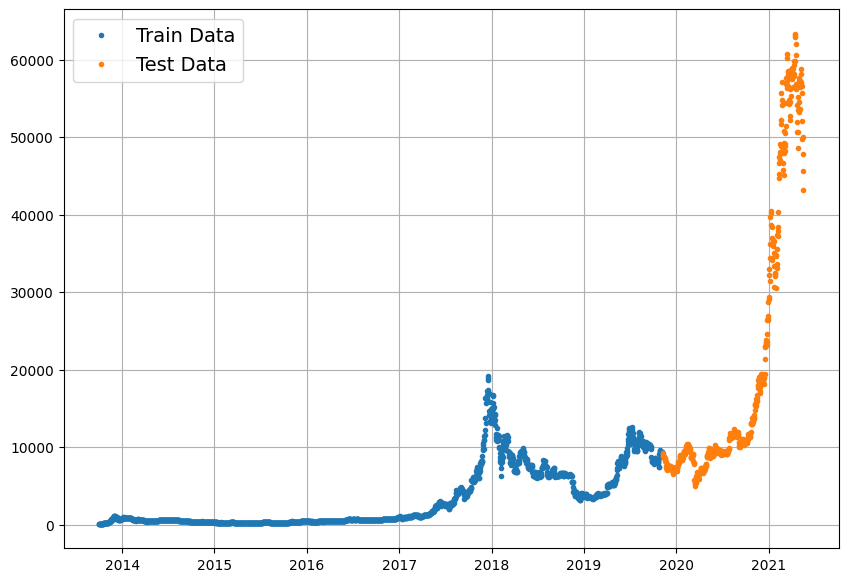

In [25]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label="Train Data")
plot_time_series(timesteps=X_test,values=y_test,label="Test Data")

Modelling experiments,
horizon = no of timesteps in future
window = past timesteps to predict the horizon9t)
Naive Bayes predicts future value based on the previous timestep.
yhat(prediction at timestep t a future value) = value at t-1

In [26]:
#create a naive forecast - all values except the last
naive_forecast = y_test[:-1]


In [27]:
X_test[:2],X_test[1:2]


(array(['2019-11-08T00:00:00.000000000', '2019-11-09T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array(['2019-11-09T00:00:00.000000000'], dtype='datetime64[ns]'))

In [28]:
y_test[:2],y_test[1:2]

(array([9226.48582088, 8794.35864452]), array([8794.35864452]))

skip one X , yhat = t-1(y)

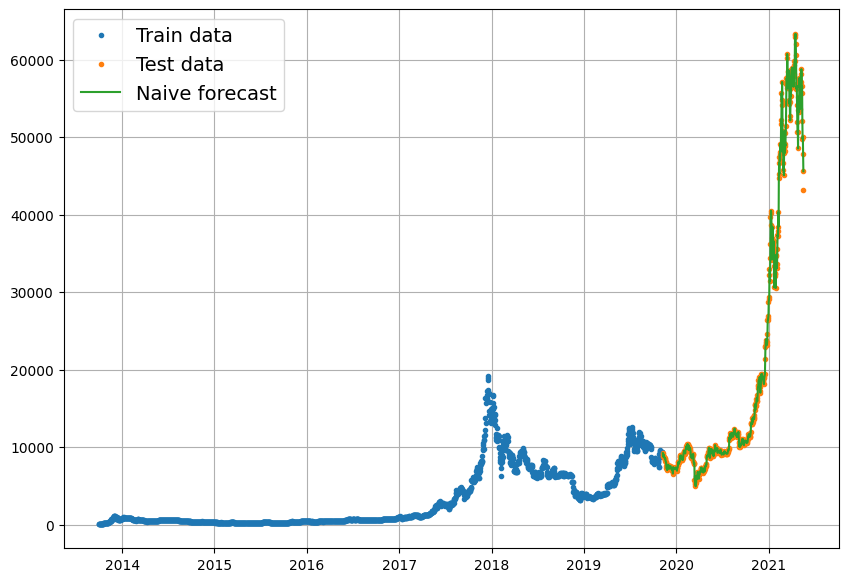

In [29]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");


In [30]:
X_test.size,y_test.size

(558, 558)

Naive forecast uses previous value to predict yhat(future values)
t1 = y0, t2 = y1,t3 = y2, tn = yn-1

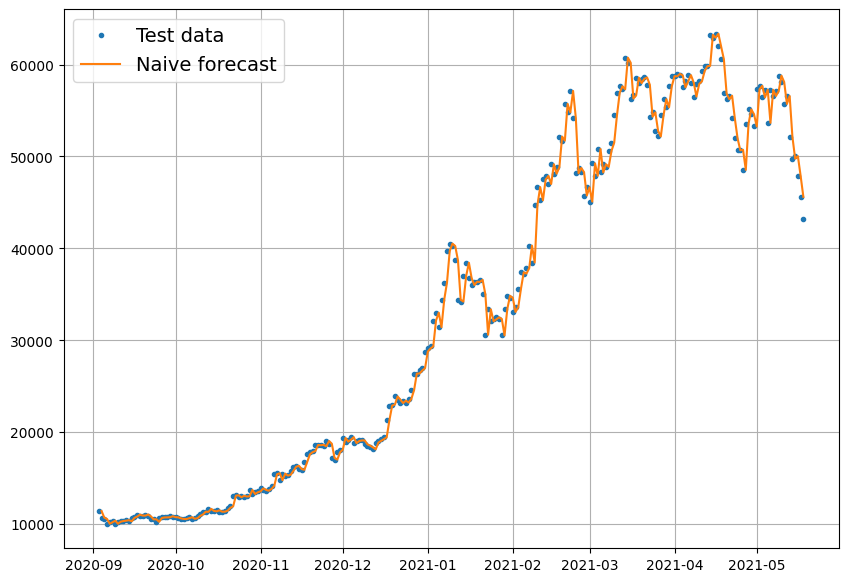

In [31]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

Regression metrics for forecasting time series.
MAE
MASE - Metrics for Mean absolute scaled error.
Calculating Naive forecast MASE


In [32]:
import tensorflow as tf

In [33]:
def mean_absolute_scaled_error(y_true,y_pred):
   # computes mean for axis across dimensions of tensor(multi diensional matrix)
   mae = tf.reduce_mean(tf.abs(y_true-y_pred));
   mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[:-1]-y_pred[1:]))# naive forecast for 1 day shift

   return mae




evaluationmetrics for y_true/y_pred

In [34]:
def evaluate_preds(y_true,y_pred):
  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mase = mean_absolute_scaled_error(y_true,y_pred)
  mape = tf.metrics.mean_absolute_percentage_error(y_true,y_pred)
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

evaluate metrics for naive foecast , y_trur = y_test[1:], y_pred = y_test[:-1]

In [35]:
naive_results= evaluate_preds(y_true=y_test[1:],y_pred=naive_forecast)
naive_results

{'mae': 567.9802273457541,
 'mse': 1147547.1250238959,
 'rmse': 1071.2362601330744,
 'mape': 2.516524929982267,
 'mase': 567.9802273457541}

each naive prediction is on average  off by 567

HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [36]:
def get_labelled_windows(x,horizon=1):
  #input
  return(x[:,:-horizon],x[:,-horizon:])#all rows,

In [37]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [38]:
test_window, test_label= get_labelled_windows(tf.expand_dims(tf.range(8)+1,axis=0),horizon=HORIZON)

In [39]:
test_window

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [40]:
test_label

<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>

In [41]:
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


create windows,

In [42]:
import numpy as np

In [43]:
def make_windows(x, window_size=7,horizon=1):
  window_step=tf.expand_dims(np.arange(window_size+horizon),axis=0)
  print(f"Window step:\n {window_step}")
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [44]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step:
 [[0 1 2 3 4 5 6 7]]
Window indexes:
 (<tf.Tensor: shape=(3, 8), dtype=int64, numpy=
array([[0, 1, 2, 3, 4, 5, 6, 7],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [2, 3, 4, 5, 6, 7, 8, 9]])>, <tf.Tensor: shape=(3, 8), dtype=int64, numpy=
array([[2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784],
       [2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785],
       [2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786]])>, TensorShape([2780, 8]))


(2780, 2780)

In [45]:
for i in range(3):
 print(f"Windows: {full_windows[i-3]} -> Label :{full_labels[i-3]}")

Windows: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label :[47885.62525472]
Windows: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label :[45604.61575361]
Windows: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label :[43144.47129086]


In [46]:
 def make_train_test_splits(windows, labels, test_split=0.2):
  split_size = int(len(windows)- (1-test_split))
  test_size=0.2
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels=  labels[split_size:]
  return train_windows,train_labels,test_windows,test_labels
